# Develop the code to draw the real part of a complex function

The following is to develop an automatic way of finding the real part of a complex function.
This is helpful for maths students studying complex anaysis. 
Also, for my own research in the steepest descent analyses. 

# 1. First version

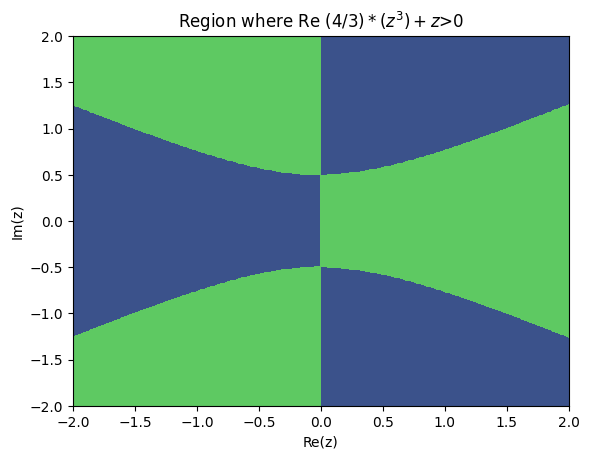

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def real_values_complex_fun(function,lower=-2,upper=2,precision=500):
    """Draw the real part of a complex function as shaded region
        Input: fun: the complex fucntion
                lower: the lowest value of the axies
                upper: the largesrt value of the axies
                precision: precision of the plot"""
    # Create grid
    x = np.linspace(lower, upper, precision)
    y = np.linspace(lower, upper, precision)
    X, Y = np.meshgrid(x, y)
    Z =  X + 1j*Y
    # Real part of the function
    F = np.real(function(Z))

    # Plot region where Re(f) > 0
    plt.figure()
    plt.contourf(X, Y, F > 0)
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(f"Region where Re {function('z')}>0")
    plt.show()

def function(z):
    if isinstance(z, str):
        return '$(4/3)*(z^3)+ z$'
    else:
        return (4/3)*(z**3)+z 
real_values_complex_fun(function)

# 2. Second version

- The title of the plot is automated. 
- Color scheme is changed: grey for positive. 

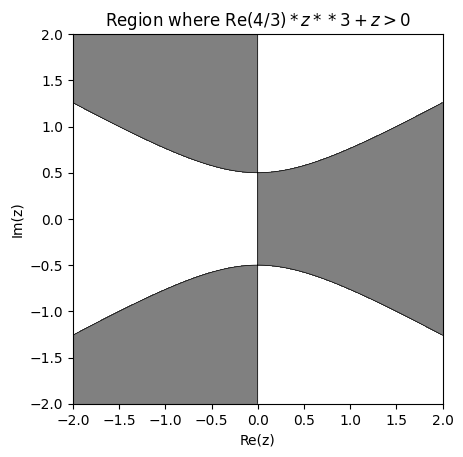

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_positive_real_region(formula, lower=-2, upper=2, precision=3000, show_boundary=True):
    """Draw the real part of a complex function as shaded region
        Input: fun: the complex fucntion
            lower: the lowest value of the axies
            upper: the largesrt value of the axies
            precision: precision of the plot"""

    # Create grid
    x = np.linspace(lower, upper, precision)
    y = np.linspace(lower, upper, precision)
    X, Y = np.meshgrid(x, y)
    z = X + 1j * Y
    F = np.real(eval(formula)) # eval() to translate str into formula

    cmap = ListedColormap(["white", "grey"])

    plt.figure()
    plt.contourf(X, Y, F > 0, levels=[-1, 0, 1], cmap=cmap)

    if show_boundary:
        plt.contour(X, Y, F, levels=[0], colors='black', linewidths=0.5)

    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(rf"Region where $\mathrm{{Re}}{formula} > 0$")
    plt.gca().set_aspect("equal") # set the frame to be equal size.
    plt.show()

plot_positive_real_region("(4/3)*z**3 + z",)